In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("WineQT.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [16]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [17]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [20]:
# Split the dataset into features (X) and target variable (y)
X = df.drop(["quality", "Id"], axis=1)
y = df["quality"]

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)


In [23]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [25]:
# Initialize classifier models
rf_model = RandomForestClassifier()
sgd_model = SGDClassifier()
svc_model = SVC()


In [26]:
# Train the random forest model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [27]:
# Train the sgd model
sgd_model.fit(X_train_scaled, y_train)

SGDClassifier()

In [28]:
# Train the svc model
svc_model.fit(X_train_scaled, y_train)

SVC()

In [29]:
from sklearn.metrics import classification_report

In [30]:
 # Evaluate Random Forest model
rf_predictions = rf_model.predict(X_test_scaled)
print("\033[1mRandom Forest Classifier:\033[0m")
print(classification_report(y_test, rf_predictions))


Random Forest Classifier:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.81      0.76        96
           6       0.67      0.64      0.65        99
           7       0.62      0.62      0.62        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.40      0.41      0.41       229
weighted avg       0.66      0.69      0.67       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
 # Evaluate SGD model
sgd_predictions = sgd_model.predict(X_test_scaled)
print("\033[1mStochastic Gradient Descent Classifier:\033[0m")
print(classification_report(y_test, sgd_predictions))

Stochastic Gradient Descent Classifier:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.62      0.77      0.69        96
           6       0.58      0.53      0.55        99
           7       0.18      0.08      0.11        26
           8       0.33      0.50      0.40         2

    accuracy                           0.56       229
   macro avg       0.34      0.37      0.35       229
weighted avg       0.53      0.56      0.54       229



In [40]:
 # Evaluate SVC model
svc_predictions = svc_model.predict(X_test_scaled)
print("\033[1mSupport Vector Classifier:\033[0m")
print(classification_report(y_test, svc_predictions))


Support Vector Classifier:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.74      0.72        96
           6       0.59      0.69      0.64        99
           7       0.54      0.27      0.36        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.37      0.34      0.34       229
weighted avg       0.61      0.64      0.62       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
# Define classes and models
classes = np.unique(y_test)
models = ['Random Forest', 'Stochastic Gradient Descent', 'Support Vector']

In [43]:
# Initialize empty lists to store F1-scores for each class and model
f1_scores = {model: [] for model in models}

In [50]:
# Calculate F1-score for each model
for model_name, predictions in zip(models, [rf_predictions, sgd_predictions, svc_predictions]):
  report = classification_report(y_test, predictions, output_dict=True)
  for class_label in classes:
    f1_scores[model_name].append(report[str(class_label)]['f1-score'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

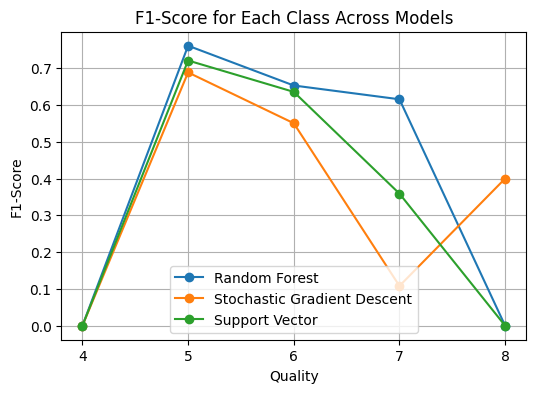

In [53]:
# Plot F1-scores for each class across models
plt.figure(figsize=(6, 4))
for model_name in models:
  plt.plot(classes, f1_scores[model_name], marker='o', label=model_name)
plt.title('F1-Score for Each Class Across Models')
plt.xlabel('Quality')
plt.ylabel('F1-Score')
plt.legend()
plt.xticks(classes)
plt.grid(True)
plt.show()

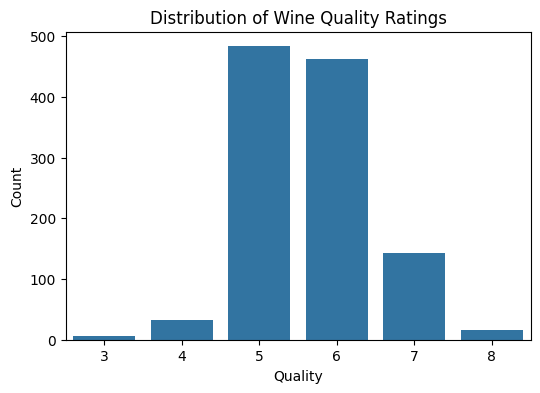

In [55]:
# Visualize the distribution of wine quality ratings
plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

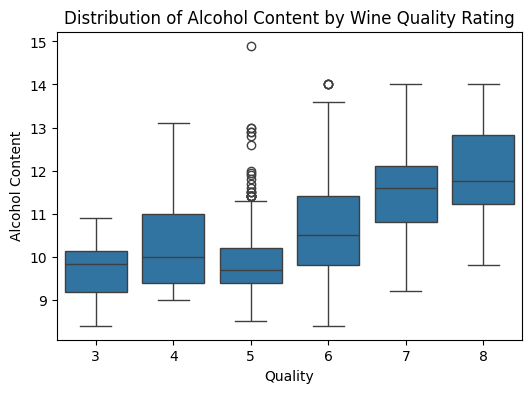

In [57]:
# Boxplot to visualize distribution of features by quality rating
plt.figure(figsize=(6, 4))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Distribution of Alcohol Content by Wine Quality Rating')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()


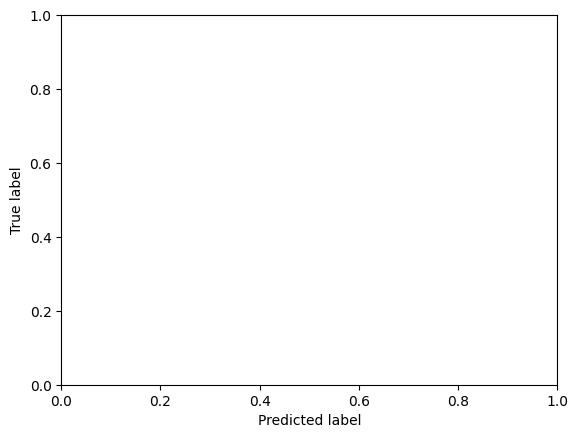

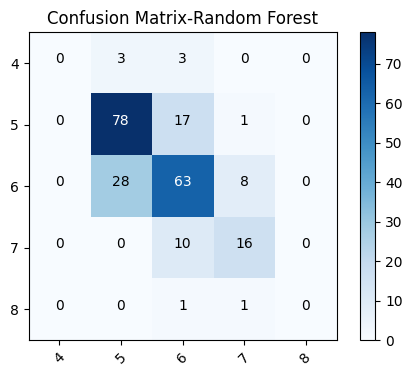

In [64]:
from sklearn.metrics import confusion_matrix
import itertools
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Calculate confusion matrix for Random Forest model
rf_cm = confusion_matrix(y_test, rf_predictions)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
plot_confusion_matrix(rf_cm, classes=np.unique(y_test), title='Confusion Matrix-Random Forest')
plt.show()

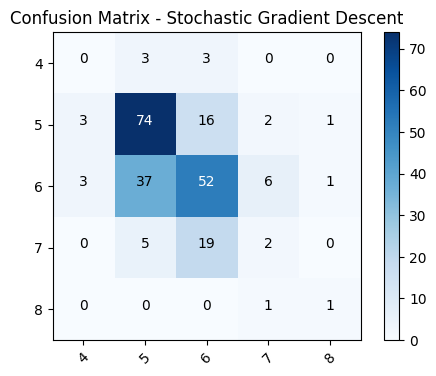

In [66]:
# Calculate confusion matrix for SGD model
sgd_cm = confusion_matrix(y_test, sgd_predictions)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
plot_confusion_matrix(sgd_cm, classes=np.unique(y_test), title='Confusion Matrix - Stochastic Gradient Descent')
plt.show()

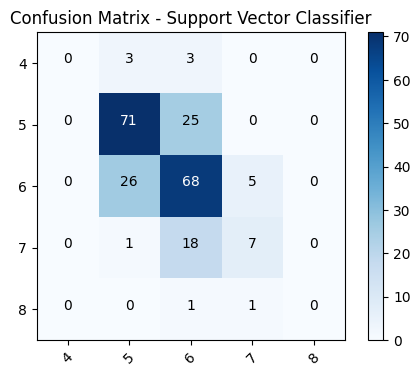

In [68]:
# Calculate confusion matrix for SVC model
svc_cm = confusion_matrix(y_test, svc_predictions)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
plot_confusion_matrix(svc_cm, classes=np.unique(y_test), title='Confusion Matrix - Support Vector Classifier')
plt.show()


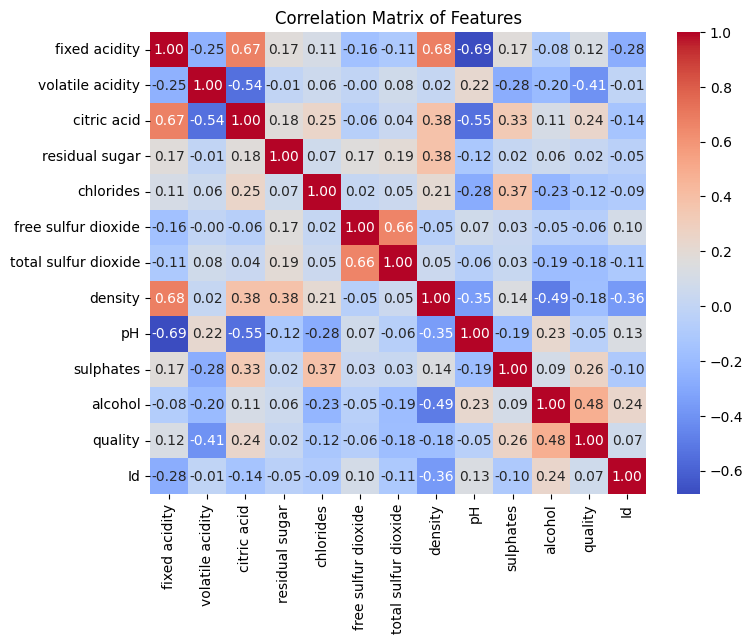

In [70]:
 # Visualize the correlation matrix of features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

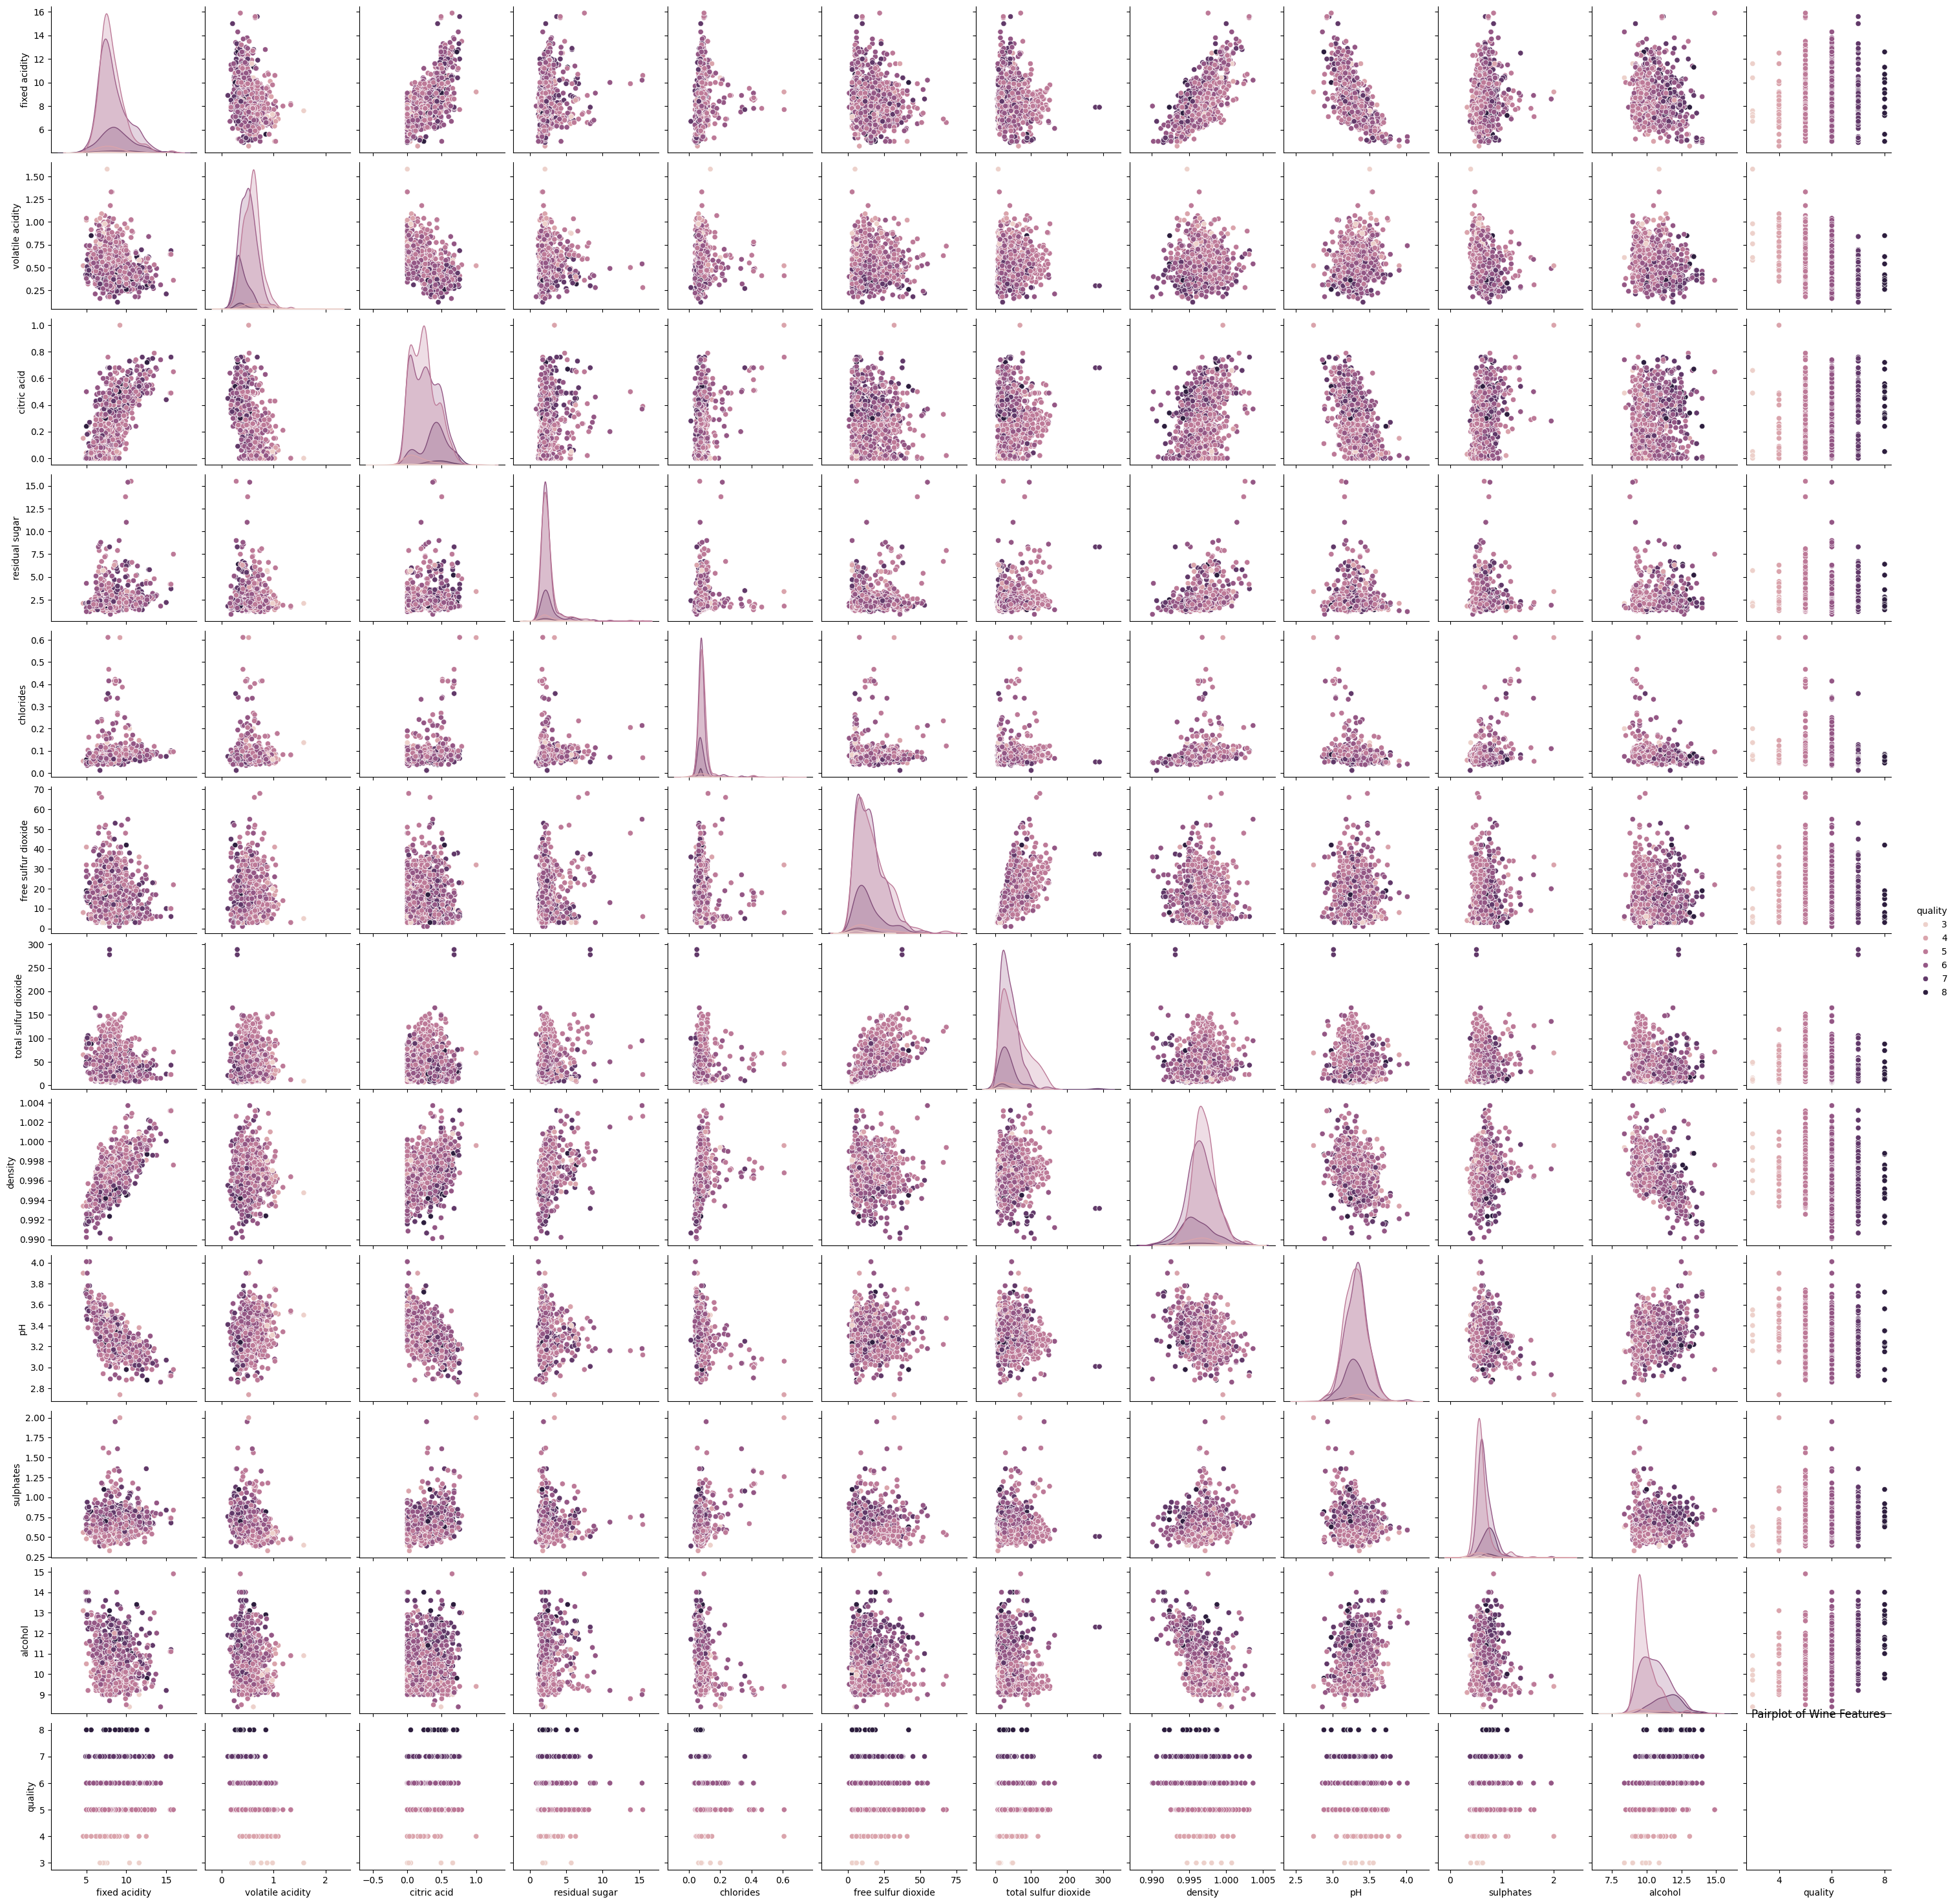

In [72]:
# Pairplot to visualize relationships between features
sns.pairplot(data=df, vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
'sulphates', 'alcohol', 'quality'], hue='quality')
plt.title('Pairplot of Wine Features')
plt.show()